> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: 
# Investigate No-show appointments Dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## PART 0 : Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of **at least one dependent variable and three independent variables**. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [9]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab  ## Although many examples use pylab, it is no longer recommended.
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## PART 1 : Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### 1.0 General Properties

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### 1.1 Correcting typos

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns = {'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


### 1.2 Replacing '-' with underscores

In [13]:
# replace '-' with underscores
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


### 1.3 Checking for errors and NaNs

In [14]:
print('Gender:',df.Gender.unique())
print('Age:',sorted(df.Age.unique()))
print('Neighbourhood:',df.Neighbourhood.unique())
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'S

As we can see from above, there does not have any NaN values. However, we need to notice the data in Age column. It is impossible for people to age below zero. Also, it is not that popular for people to age above 95. Therefore, we need to treat those data below 0 and above 95 as outliters.

In [15]:
df = df[(df.Age >= 0) & (df.Age <= 95)]

### 1.4 Coverting DateTime and Adding AwaitingTime column

In [16]:
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df['AwaitingTime'] = (df.AppointmentDay - df.ScheduledDay).dt.days
df.AwaitingTime = df.AwaitingTime.apply(abs)

print(df.ScheduledDay.head())
print(df.AppointmentDay.head())
print(df.AwaitingTime.head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]
0    1
1    1
2    1
3    1
4    1
Name: AwaitingTime, dtype: int64


In [17]:
print('AwaitingTime:',sorted(df.AwaitingTime.unique()))

AwaitingTime: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]


## PART 2 : Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Analyzing the probability of showing up with respect to different features

For further graphing, there are two functions to reture the value of the proportion of showing up in numerical data type and categorical data type separately.

In [20]:
def probStatus(dataset, group_by):
    tm = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    tm['probShowUp'] = tm['Yes'] / (tm['Yes'] + tm['No'])
    return tm[[group_by, 'probShowUp']]

In [23]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.No_show == 'Yes')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

### 1. Age

Let us see the probability of showing up in Age from the graph below.

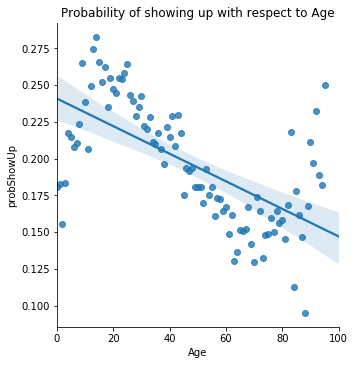

In [22]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

From the graph above we can see that it has a weak negative correlation.

### 2. Gender

Let us see the probability of showing up in Gender from the graph below.

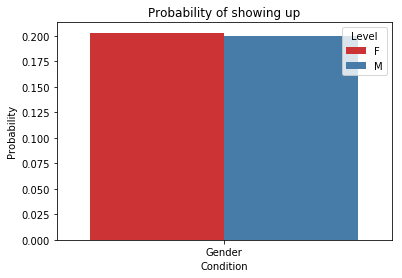

In [30]:
sns.barplot(data = probStatusCategorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

The probability in showing up does not have great difference in Male and Female.

### 3. Disease

Let us see the probability in different disease from the graph below. '1' refers to have the disease, otherwise, '0' refers to do not have the disease.

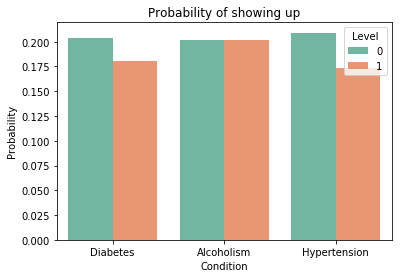

In [26]:
sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

For Alcoholism, there does not have gap between whether is an Alcoholism or not.
For Diabetes and Hypertension, people who do not have the disease are tend to show up.

### 4. Scholarship

Let us see the probability in Scholarship. '1' refers to have Scholarship and '0' refers to do not have Scholarship.

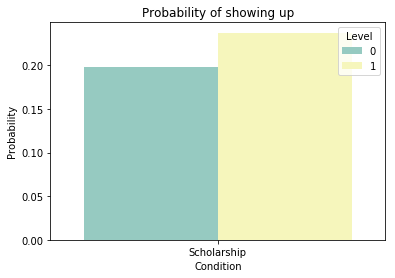

In [31]:
sns.barplot(data = probStatusCategorical(['Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set3')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

People who have scholarship are tend to show up.

### 5. Handicap

Let us see the probability in Handicap. 

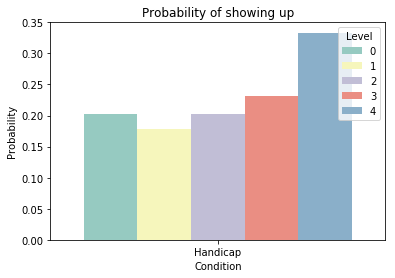

In [33]:
sns.barplot(data = probStatusCategorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set3')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

There is limitation to interpret the result. Since there do not have any clue to what do '0','1','2','3','4' refer to.

### 6. SMS_received

Let us see the probability in SMS_received. '1' refers to who received SMS and '0' refers who did not receive SMS.

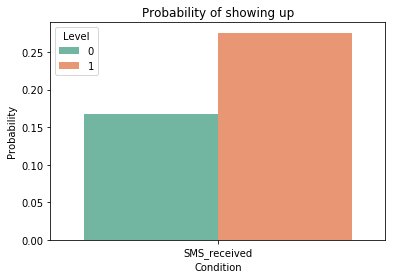

In [36]:
sns.barplot(data = probStatusCategorical(['SMS_received']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

People who received SMS are tend to show up.

### 7. AwaitingTime

Finally, the waiting time.

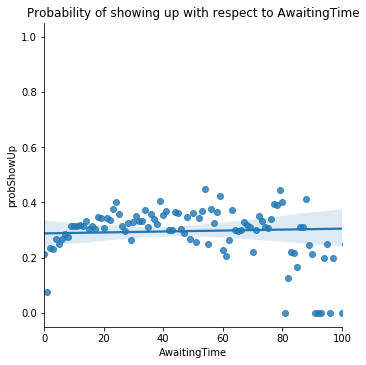

In [42]:
sns.lmplot(data = probStatus(df, 'AwaitingTime'), x = 'AwaitingTime', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to AwaitingTime')
plt.show()

As we can see, there does not have any correlation in AwaitingTime and the plot is perfectly flat with zero slope.

## PART 3 : Conclusions

From the above anaysis, we can noticed from the y axis that the probability of showing up, in all features, is relatively low. Also, there does not have strong correlation showed. Therefore, it is hard to give a specific reason for why or what factors affecting the showing up probability. 

However, we can find the correlation in Age. It has a weak negative correlation. Otherwise, there does not have any correlation in AwaitingTime and the plot is perfectly flat with zero slope. 

The limitation is the data of Neighbourhood. It is imposible to group the location by province so this column of data can not be analyzed and concluded.

From the very beginning, I have no idea how to approach a dataset all by my own. I got many questions in my mind such as What kind of data should I keep? How to plot a graph within few code sentences? etc. Till the end of this project, I got more familiar with those libraries and learnt how to do a Kaggle sourced analysis report from zero to whole. Now, I am ready to be a Kaggler. ;)

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

refernce:
https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show